# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 8 de mayo de 2023__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 1234

# Apartado 1: Análisis de sentimientos


__Número de grupo: 20__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Juan Pablo Corella Martín__

## 1) Carga del conjunto de datos

El fichero `IMBD_Dataset.csv` contiene opiniones de películas clasificadas en 2 categorías diferentes (positiva/negativa).

Este set de datos se creó utilizando el "IMDB Dataset of 50K Movie Reviews", el cual contiene 50,000 reseñas de películas con un sentimiento positivo o negativo adjunto a ellas.

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. Comprueba que la distribución de los ejemplos en las clases es la misma en entrenamiento y test. 

----

In [2]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np


In [4]:
# imbd_file = '/content/drive/MyDrive/IA2/p3/IMDB_Dataset.csv'

# df=pd.read_csv(imbd_file)
# df.head()

In [5]:
imbd_file = './IMDB_Dataset.csv'

df = pd.read_csv(imbd_file)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
print("Positivo:\n" + df.review[0])
print("Negativo:\n" + df.review[3])
print(df.sentiment.value_counts())

Positivo:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

La distribución es equitativa en sentimiento. Sin embargo, vasmos a normalizar el texto para quitar las tags HTML, que todo esté a minúsculas y eliminar palabras sin demasiado significado para lo que necesitamos (stopwords).

In [7]:
import re
import nltk
from os import path, getcwd

nltk_path = path.join(getcwd(), 'data')
nltk.data.path.append(nltk_path)
# nltk.download('stopwords', nltk_path)

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub('<br />', ' ', doc)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)


In [8]:
df_original = df.copy(deep=True)

In [9]:
from sklearn.model_selection import train_test_split

df.review = normalize_corpus(df.review)
train_data, test_data = train_test_split(df, test_size=0.2,random_state=RANDOM_STATE)

print(train_data['sentiment'].value_counts())
print(test_data['sentiment'].value_counts())

negative    20012
positive    19988
Name: sentiment, dtype: int64
positive    5012
negative    4988
Name: sentiment, dtype: int64


La distribución de sentimiento sigue siendo buena, por lo que continuaremos con esta división.

## 2) Estudio del efecto de distintas representaciones y distintos algoritmos para resolver la tarea

Construye distintas representaciones vectoriales basadas en lo contado en las clases de teoría (bolsas de palabras con 2 configuraciones distintas significativas) y utilízalas con 2 de los algoritmos estudiados (árboles de decisión y naive bayes)

Para una única configuración, muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?


------

In [10]:

import matplotlib.pyplot as plt

%matplotlib inline


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(train_data.review)
feature_names = vectorizer.get_feature_names_out()

print(len(feature_names))


142916


In [12]:
print(feature_names[:100])
print(feature_names[-100:])

['02' '03' '10' '1942' '1992' '1997' '2009' '2012' '2040' '20th' '25' '26'
 '3d' '44yrs' '45' '75' '7th' '90' '911' '98' 'aa' 'aaa' 'aaaaaaaargh'
 'aaaaagh' 'aaaaah' 'aaaaarrrrrrgggggghhhhhh' 'aaaaatchkah' 'aaaaaw'
 'aaaahhhhhh' 'aaaahhhhhhh' 'aaaand' 'aaaarrgh' 'aaaawwwwww' 'aaagh'
 'aaah' 'aaahhhhhhh' 'aaahthe' 'aaall' 'aaand' 'aaargh' 'aaarrrghim'
 'aaaugh' 'aab' 'aachen' 'aada' 'aadha' 'aadmittedly' 'aag' 'aage' 'aagh'
 'aah' 'aahed' 'aahemy' 'aahhh' 'aahhhh' 'aahing' 'aaila' 'aailiyah'
 'aaja' 'aajala' 'aak' 'aakash' 'aake' 'aaker' 'aakrosh' 'aalcc' 'aaliyah'
 'aaliyahs' 'aalox' 'aames' 'aamess' 'aamilne' 'aamir' 'aamirs'
 'aamirsalmanraveenakarishma' 'aamr' 'aan' 'aankh' 'aankhen' 'aaoon' 'aap'
 'aapke' 'aapkey' 'aaran' 'aardman' 'aardmans' 'aardvark' 'aardvarks'
 'aargh' 'aarika' 'aaron' 'aaroncurb' 'aarons' 'aarp' 'aarrrgh' 'aashok'
 'aasize' 'aasmaan' 'aasman' 'aatish']
['zorn' 'zorro' 'zorrohell' 'zorros' 'zorrostyle' 'zors' 'zosch' 'zoschs'
 'zosh' 'zounds' 'zouzou' 'zowee' 

In [13]:
#* Mucho ruido, vamos a usar nuestro vocabulario
with open('./words.txt') as f:
    dictionary = f.read().splitlines()

# El diccionario cargado lo pasamos en el parámetro vocabulary
vectorizer = CountVectorizer(vocabulary=dictionary, lowercase=True, stop_words='english')
train_vector_data=vectorizer.fit_transform(train_data.review)
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:100])

c:\JP\UNIVERSIDAD\AÑO 6\IA 2\Prácticas\env\Lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


['2' '1080' '&c' '10-point' '10th' '11-point' '12-point' '16-point'
 '18-point' '1st' '2,4,5-t' '2,4-d' '20-point' '2D' '2nd' '30-30' '3D'
 '3-D' '3M' '3rd' '48-point' '4-D' '4GL' '4H' '4th' '5-point' '5-T' '5th'
 '6-point' '6th' '7-point' '7th' '8-point' '8th' '9-point' '9th' 'a' "a'"
 'a-' 'A&M' 'A&P' 'A.' 'A.A.A.' 'A.B.' 'A.B.A.' 'A.C.' 'A.D.' 'A.D.C.'
 'A.F.' 'A.F.A.M.' 'A.G.' 'A.H.' 'A.I.' 'A.I.A.' 'A.I.D.' 'A.L.' 'A.L.P.'
 'A.M.' 'A.M.A.' 'A.M.D.G.' 'A.N.' 'a.p.' 'a.r.' 'A.R.C.S.' 'A.U.'
 'A.U.C.' 'A.V.' 'a.w.' 'A.W.O.L.' 'A/C' 'A/F' 'A/O' 'A/P' 'A/V' 'A1'
 'A-1' 'A4' 'A5' 'AA' 'AAA' 'AAAA' 'AAAAAA' 'AAAL' 'AAAS' 'Aaberg'
 'Aachen' 'AAE' 'AAEE' 'AAF' 'AAG' 'aah' 'aahed' 'aahing' 'aahs' 'AAII'
 'aal' 'Aalborg' 'Aalesund' 'aalii' 'aaliis']


In [14]:
print(feature_names[-100:])

['Zsigmondy' 'Zsolway' 'ZST' 'ZT' 'Ztopek' 'Zubeneschamali' 'Zubird'
 'Zubkoff' 'zubr' 'Zuccari' 'zuccarino' 'Zuccaro' 'Zucchero' 'zucchetti'
 'zucchetto' 'zucchettos' 'zucchini' 'zucchinis' 'zucco' 'zuchetto'
 'Zucker' 'Zuckerman' 'zudda' 'zuffolo' 'zufolo' 'Zug' 'zugtierlast'
 'zugtierlaster' 'zugzwang' 'Zui' 'Zuian' 'Zuidholland' 'zuisin' 'Zulch'
 'Zuleika' 'Zulema' 'Zulhijjah' 'Zulinde' 'Zulkadah' "Zu'lkadah"
 'Zullinger' 'Zullo' 'Zuloaga' 'Zulu' 'Zuludom' 'Zuluize' 'Zulu-kaffir'
 'Zululand' 'Zulus' 'zumatic' 'zumbooruk' 'Zumbrota' 'Zumstein' 'Zumwalt'
 'Zungaria' 'Zuni' 'Zunian' 'zunyite' 'zunis' 'zupanate' 'Zupus' 'Zurbar'
 'Zurbaran' 'Zurek' 'Zurheide' 'Zurich' 'Zurkow' 'zurlite' 'Zurn' 'Zurvan'
 'Zusman' 'Zutugil' 'zuurveldt' 'zuza' 'Zuzana' 'Zu-zu' 'zwanziger'
 'Zwart' 'ZWEI' 'Zweig' 'Zwick' 'Zwickau' 'Zwicky' 'Zwieback' 'zwiebacks'
 'Zwiebel' 'zwieselite' 'Zwingle' 'Zwingli' 'Zwinglian' 'Zwinglianism'
 'Zwinglianist' 'zwitter' 'zwitterion' 'zwitterionic' 'Zwolle' 'Zworykin'
 

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculamos el valor TF-IDF 

tfidfer = TfidfTransformer()
train_preprocessed = tfidfer.fit_transform(train_vector_data)

print(train_preprocessed[10])

  (0, 461456)	0.11989365746512116
  (0, 454391)	0.11043887058991439
  (0, 453100)	0.14257574801192957
  (0, 445295)	0.08848783618616268
  (0, 445293)	0.09022943596933576
  (0, 426779)	0.15188532598862672
  (0, 423590)	0.15324142837596613
  (0, 422359)	0.2076175661426271
  (0, 413166)	0.13248120052727672
  (0, 394746)	0.06877354332620628
  (0, 383473)	0.15885876444636723
  (0, 374782)	0.11357337046332606
  (0, 342778)	0.08723546814339887
  (0, 342771)	0.06798534697244593
  (0, 341007)	0.06576525380242727
  (0, 323928)	0.09649448314550338
  (0, 323795)	0.0967108043311408
  (0, 317643)	0.10868026370572319
  (0, 309133)	0.0915691878776192
  (0, 299724)	0.07349896731950957
  (0, 299619)	0.0788818569745928
  (0, 289704)	0.0490862534548081
  (0, 285822)	0.10149434945653268
  (0, 254206)	0.15161123037226257
  (0, 252607)	0.14236930969388611
  :	:
  (0, 143770)	0.09540527532219967
  (0, 138922)	0.03266729993040315
  (0, 137919)	0.1432079439992876
  (0, 133566)	0.0865115710113175
  (0, 131076)	0

In [16]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [46]:
# vamos a ver un mensaje vectorizado
write_terms(feature_names, None, train_vector_data, 0)

print("Mensaje original: " + df_original["review"][train_data.iloc[0].name])

Mensaje 0 vectorizado: ['alive' 'calm' 'comedian' 'comics' 'comparison' 'crazy' 'didnt' 'drive'
 'extreme' 'floor' 'funnier' 'hard' 'higher' 'yell' 'yelling' 'joke'
 'jokes' 'laugh' 'like' 'liked' 'maybe' 'make' 'mental' 'people' 'pieces'
 'quite' 'rating' 'really' 'rolling' 'said' 'spilling' 'sure' 'tries'
 'understand' 'wants' 'water'] 

Mensaje original: Dane tries to hard and is to extreme with all of his yelling and going crazy, spilling water on himself and rolling on the floor. To much. Calm down, get yourself together and make us laugh. I didn't quite understand his comparison toward comics and rock stars. Just because there both up on stage or something? He said that every comedian wants to be a rock star. I'm sure Rodney Dangerfield was really into that when he was alive. He had a few good jokes like the Burger King joke where people yell at the drive thru. I also liked the Reese's Pieces joke. If Dane just didn't act so mental he might be funnier and I might have given this 

Podemos observar que se eliminan palabras que no aportan nada al sentimiento de la review, como preposiciones, pronombres y formas verbales de ser/estar.

In [18]:
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data=vectorizer.transform(test_data.review)

# Ahora calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed=tfidfer.transform(test_vector_data)

ENTRENAMOS LOS MODELOS

a.1) Árbol de decisión con TF-IDF

In [19]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_preprocessed, train_data.sentiment)

# Realizamos las predicciones
tree_train_predictions = tree_classifier.predict(train_preprocessed)
tree_test_predictions = tree_classifier.predict(test_preprocessed)
print("Árbol TF-IDF, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_data.sentiment))
print("Árbol TF-IDF, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_data.sentiment))

Árbol TF-IDF, porcentaje de aciertos en entrenamiento: 1.0
Árbol TF-IDF, porcentaje de aciertos en test: 0.7206


Que los aciertos en el grupo del entrenamiento no sorprenden al ser un árbol de clasificación.

              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      4988
    positive       0.72      0.72      0.72      5012

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

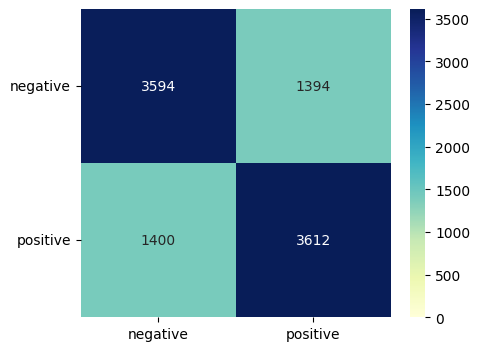

In [20]:
%matplotlib inline
#En el output de esta celda se puede ver que las cantidades en support cuadran en categoría con las de arriba.
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

target_names = list(test_data["sentiment"].unique())

# creamos una variable auxiliar para las predicciones
predictions = tree_test_predictions

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------



# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(5,4))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


Falla alrededor del 30% de las veces tanto en las positivas como en las negativas, lo que puede sugerir que haya palabras con altas frecuencias muy comunes en los dos tipos de texto.

a.2) Árbol de decisión con CountVectorizer

In [28]:
# Creamos el clasificador con los valores por defecto
tree_classifier_cv = tree.DecisionTreeClassifier()
tree_classifier_cv.fit(train_vector_data, train_data.sentiment)

tree_train_predictions_cv = tree_classifier_cv.predict(train_vector_data)
tree_test_predictions_cv = tree_classifier_cv.predict(test_vector_data)

print("Árbol CountVectorizer, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions_cv == train_data.sentiment))
print("Árbol CountVectorizer, porcentaje de aciertos en test:", np.mean(tree_test_predictions_cv == test_data.sentiment))

Árbol CountVectorizer, porcentaje de aciertos en entrenamiento: 1.0
Árbol CountVectorizer, porcentaje de aciertos en test: 0.7232


              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      4988
    positive       0.72      0.73      0.72      5012

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

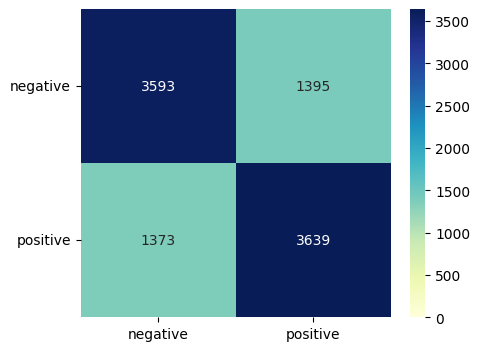

In [29]:
%matplotlib inline

predictions = tree_test_predictions_cv

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------


# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


Los resultados son muy parecidos a los del otro árbol, incluso en la precisión y en la exhaustividad. Claramente hay palabras que están interfiriendo en la clasificación.

b.1) Naive Bayes con TF_IDF

In [30]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, train_data.sentiment)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes TF-IDF, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == train_data.sentiment))
print("Multinomial Naive Bayes TF-IDF, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == test_data.sentiment))

Multinomial Naive Bayes TF-IDF, porcentaje de aciertos en entrenamiento: 0.896175
Multinomial Naive Bayes TF-IDF, porcentaje de aciertos en test: 0.857


Los porcentajes son más parecidos sin ser perfectos, por lo que no parece que haya sobreentrenamiento.

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4988
    positive       0.87      0.84      0.85      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

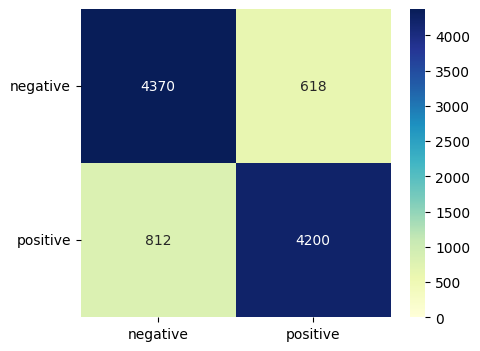

In [31]:
%matplotlib inline

predictions = mnb_test_predictions

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------


# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


Los resultados son bastante mejores que con los arboles, aunque se aprecia que bastantes positivas se clasifican como negativas. Esto hace que la precisión de las negativas baje, aunque la exhaustividad roze el 90%.

b.2) Naive Bayes con Count-Vectorizer

In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier_cv = MultinomialNB()

mnb_classifier_cv.fit(train_vector_data, train_data.sentiment)

mnb_train_predictions_cv = mnb_classifier_cv.predict(train_vector_data)
mnb_test_predictions_cv = mnb_classifier_cv.predict(test_vector_data)

print("Multinomial Naive Bayes CountVectorizer, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions_cv == train_data.sentiment))
print("Multinomial Naive Bayes CountVectorizer, porcentaje de aciertos en test:", np.mean(mnb_test_predictions_cv == test_data.sentiment))

Multinomial Naive Bayes CountVectorizer, porcentaje de aciertos en entrenamiento: 0.8839
Multinomial Naive Bayes CountVectorizer, porcentaje de aciertos en test: 0.8442


              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      4988
    positive       0.86      0.82      0.84      5012

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

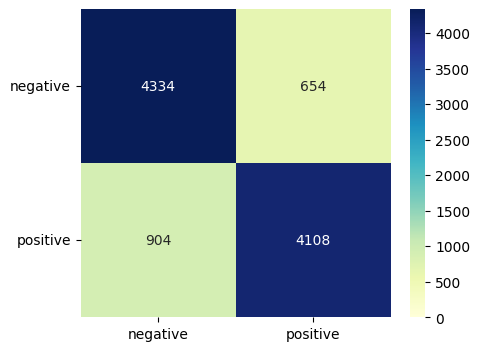

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
#En el output de esta celda se puede ver que las cantidades en support cuadran en categoría con las de arriba.

target_names = list(test_data["sentiment"].unique())

# creamos una variable auxiliar para las predicciones
predictions = mnb_test_predictions_cv

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------


# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(5,4))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


Sucede lo mismo que en el anterior, aunque la mala clasificación de las positivas se acentúa mucho más que la de las negativas.

Comparamos un mensaje original con su forma vectorizada:

In [34]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

## 3) Análisis comparativo final

Se han entrenado varios clasificadores usando vectorizaciones diferentes de los datos. Compara las diferencias entre representaciones para un mismo algoritmo y entre algoritmos. Explica a qué crees que se deben las diferencias.

Analiza con detalle el mejor clasificador de cada tipo. Indica las palabras más relevantes. Busca un ejemplo mal clasificado de cada clase, justifica el error ¿se te ocurre alguna forma de solucionarlo?


------

Añadimos los resultados de los test al df para poder comparar facilmente los resultados obtenidos sobre sentimientos.

In [47]:
test_data["tree-tfidf"] = tree_test_predictions
test_data["tree-count"] = tree_test_predictions_cv
test_data["nb-tfidf"] = mnb_test_predictions
test_data["nb-count"] = mnb_test_predictions_cv

test_data.head()

,review,sentiment,tree-tfidf,tree-count,nb-tfidf,nb-count
20308,although film made dogme emerged predominant m...,negative,positive,positive,positive,positive
37706,grandmother took sister see movie came theater...,negative,positive,negative,negative,negative
6041,possibly worst film within genre existence ann...,negative,negative,negative,negative,negative
42143,long keep mind production movie copyright ploy...,negative,negative,positive,negative,negative
23202,plot petites coupures certainly left viewer du...,negative,negative,positive,negative,negative


En el primer ejemplo podemos ver un fallo en la clasificación por parte de los cuatro clasificadores. Comprobamos en ambos casos los resultados con Naive Bayes ya que el árbol de decisión ofrece peores resultados con ambos vectorizadores.

In [48]:
def print_top30_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    print("Top 30 features per class\n")
    for i, class_label in enumerate(class_labels):
        top30 = np.argsort(clf.feature_log_prob_[i])[-30:]
        reversed_top = top30[::-1]

        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)), '\n')

        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')


In [49]:
print("Clasificador Naive Bayes con TF-IDF:\n")
print_top30_features_per_class_in_NB(vectorizer, mnb_classifier_cv,  target_names)  

Clasificador Naive Bayes con TF-IDF:

Top 30 features per class

negative: movie / film / like / bad / really / dont / people / make / movies / acting / plot / way / characters / watch / think / films / know / better / character / thing / scene / end / scenes / didnt / watching / doesnt / actually / actors / worst / funny 

positive: film / movie / like / really / people / films / way / characters / movies / think / dont / watch / character / make / know / years / end / scene / scenes / real / makes / acting / better / plot / world / quite / cast / funny / actors / series 



In [32]:
print("Clasificador Naive Bayes con CountVectorizer:\n")
print_top30_features_per_class_in_NB(vectorizer, mnb_classifier, target_names)  

Clasificador Naive Bayes con CountVectorizer:

Top 30 features per class

negative: movie / film / bad / like / really / dont / movies / acting / make / plot / people / watch / worst / better / think / characters / way / know / films / didnt / watching / thing / character / actors / scenes / funny / actually / end / scene / minutes 

positive: movie / film / like / really / people / films / movies / think / watch / way / characters / dont / character / know / years / make / funny / excellent / real / end / acting / makes / series / better / scenes / cast / scene / music / world / actors 



Como podemos ver, las palabras más destacadas en ambos casos son "movie" y "film", lo cual tiene sentido al ser palabras que se repiten constantemente. "Like" también está muy arriba al ser un verbo muy común, también en su forma negada.

Podemos ver que el clasificador de tfidf clasifica "funny" como algo malo, mientras que con CountVectorizer lo clasifica como algo positivo. Errores de clasificación como este pueden llevar a que una review sea calificada de forma errónea por parte de los clasificadores. Por otro lado, "bad" ha sido bien clasificada en ambos casos.

In [33]:
df_original["review"][23202]


"The plot in Petites Coupures certainly left this viewer dumbfounded.<br /><br />***spoiler***<br /><br />In the space of 48hrs or so, Auteuil's character has an affair with a teenager, loses his wife's affections, attempts to seduce Scott Thomas, is rejected by her goes on to grope yet another female character in the back of a car and then is finally shot for his trouble.<br /><br />***end of spoiler***<br /><br />wha ???<br /><br />The only saving grace in this flick is Kristin Scott Thomas. Similar to Charlotte Rampling, she seems a *natural* to star in French cinema. My hope is that one day François Ozon may cast her in a part where she can show her true talent.<br /><br />There are some fine French films such as the remarkable Le Colonel Chabert begging for a DVD release, yet this is the tripe that gets chosen.<br /><br />Avoid this one.<br /><br />zzzz.."

Podemos ver que esta review habla negativamente de la película, pero positivamente de la actriz. Esto puede haber generado confusión en los entrenamientos.

Con estos datos deducimos que la alta repetición de palabras puede estar confundiendo a ambos tipos de clasificadores, por lo que su eliminación del corpus quizá mejore la clasificación al eliminar componentes ambiguas.